In [9]:
from BNN_Forward_Propagation import bnn_forward_propagation
from BNN_Probabilistic_Back_Propagation import bnn_probabilistic_back_propagation

import numpy as np

input_layer = [1]
hidden_layers = [3, 3]
output_layer = [1]

feature_data = np.array([[1]])
target_data = np.array([[0.5]])

learning_rate = 0.001
bnn_fp = bnn_forward_propagation(input_layer, hidden_layers, output_layer, feature_data, target_data)

model_structure = bnn_fp.generate_model_structure()
m = bnn_fp.generate_m(model_structure)
v = bnn_fp.generate_v(model_structure)

bnn_pbp = bnn_probabilistic_back_propagation(model_structure, target_data, learning_rate)

store_mz = []
store_vz = []

j = 100000

for i in range(j):
    ma, va, cdf, minus_cdf, pdf, gamma, alpha, mz, vz = bnn_fp.forward_propagation(m, v, model_structure)
    
    if i % (j / 10) == 0:
        store_mz.append(mz[-1][0, 0])
        store_vz.append(vz[-1][0, 0])

    d_logz_over_m, d_logz_over_v = bnn_pbp.calculate_derivatives(m, v, ma, va, cdf, minus_cdf, pdf, gamma, alpha, mz, vz)
    bnn_pbp._linear_learning_rate_scheduler(0.0005 , j, i)
    
    m = bnn_pbp.optimize_m(m, v, d_logz_over_m)
    v = bnn_pbp.optimize_v(m, v, d_logz_over_m, d_logz_over_v)

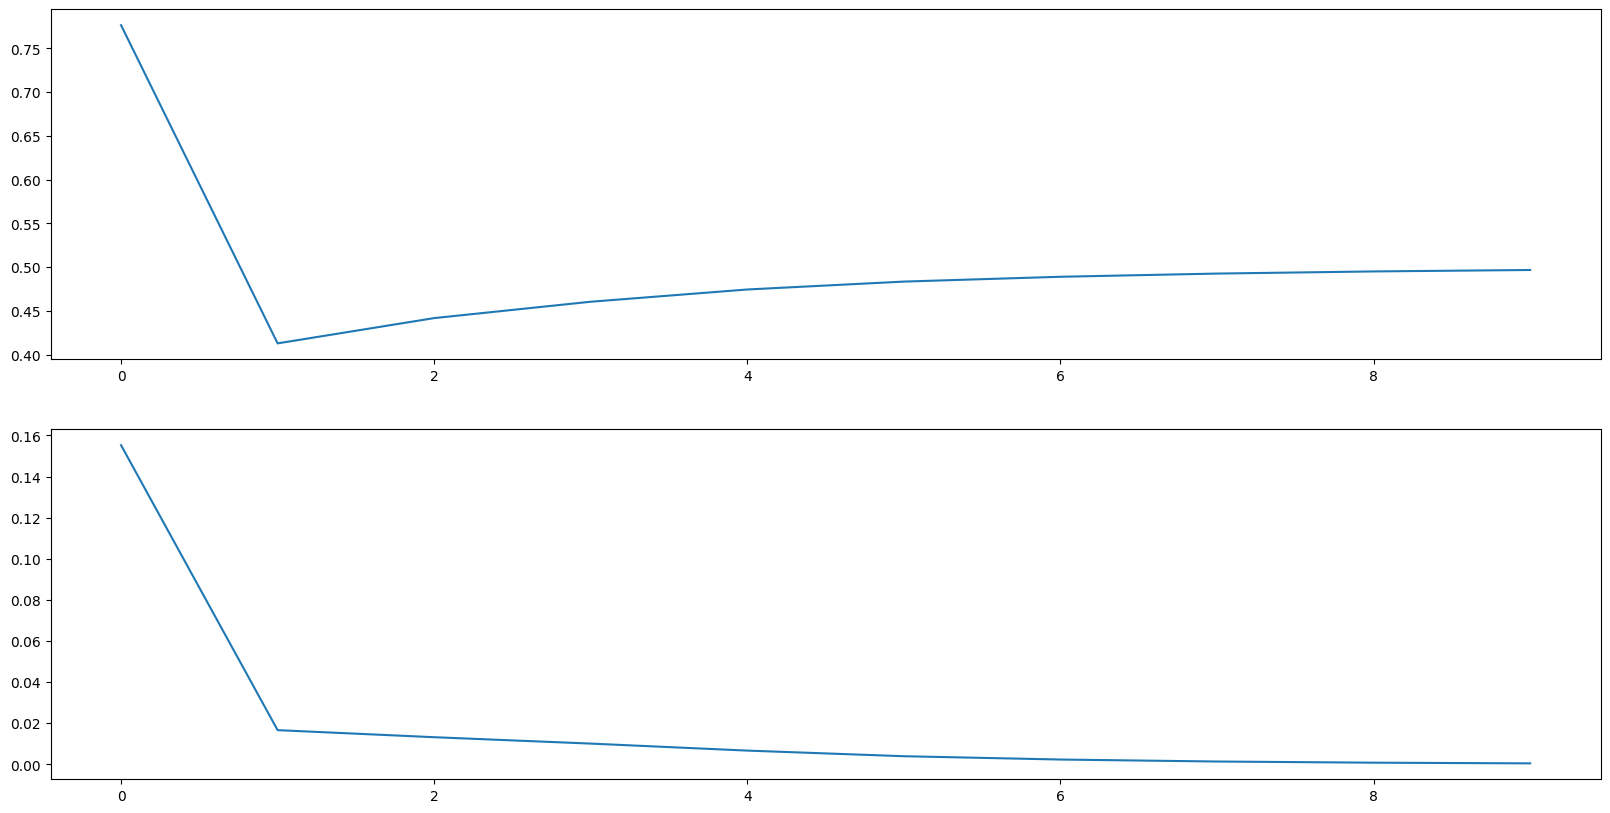

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

ax1.plot(store_mz)
ax2.plot(store_vz)

In [11]:
store_mz[-10:]

[0.7764501203944528,
 0.41304774851036513,
 0.4419177144555425,
 0.46060338891446384,
 0.47458634776349595,
 0.4836108541233605,
 0.4891161082288544,
 0.492759490798455,
 0.4952073585730776,
 0.4968577795492546]

In [12]:
store_vz[-10:]

[0.1552648017705976,
 0.016631529427336665,
 0.013199306633286867,
 0.010091659200400229,
 0.006683348434756825,
 0.003948900631554525,
 0.0023357693224466632,
 0.0013740975129574885,
 0.0008058556229523728,
 0.00047224773217197053]